In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [19]:
fb = pd.read_csv('/content/FremontBridge.csv', index_col='Date', parse_dates=True)

<ipython-input-19-5bece08f88f7>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fb = pd.read_csv('/content/FremontBridge.csv', index_col='Date', parse_dates=True)


In [20]:
fb.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [21]:
fb.columns=["East","West"]

In [22]:
# fb['Total'] = fb['East'] + fb['West']
fb['Total'] = fb.eval('East + West')
fb.head(5)

,East,West,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


In [23]:
fb.isna().sum()


East     9
West     9
Total    9
dtype: int64

In [24]:
fb.dropna(inplace=True)

Text(0, 0.5, 'Hourly Bicycle Count')

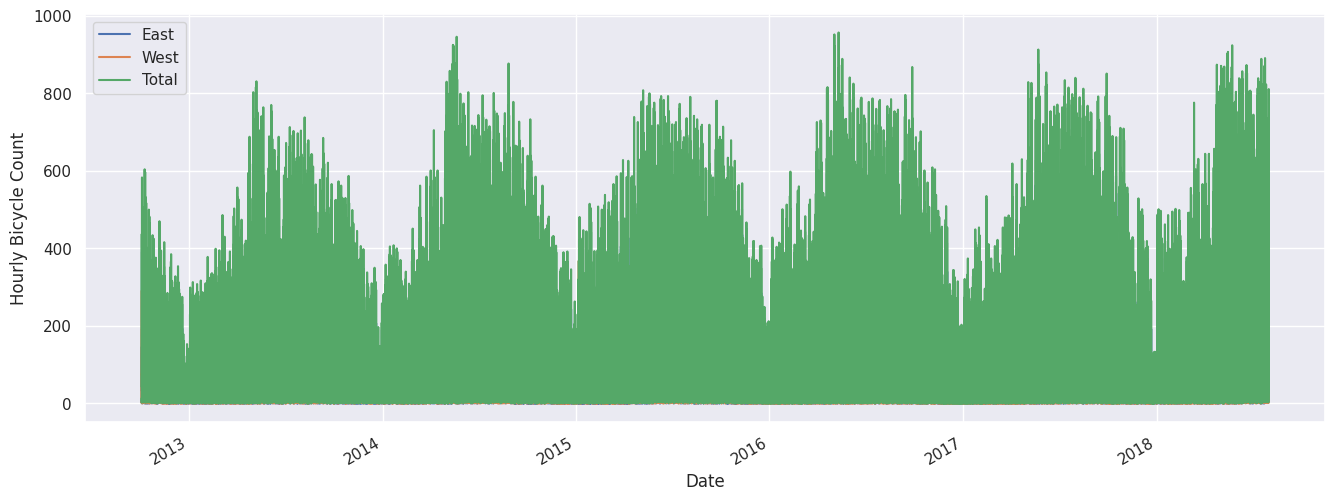

In [25]:
fb.plot( figsize=(16,6))
plt.legend(loc='upper left')
plt.ylabel('Hourly Bicycle Count')
# Obsevation: The 30k+ samples are way too dense to make sense, because we hardly see East and West data ata the bottom.


fb_daily size : 6384


Text(0, 0.5, 'Daily Bicycle Count')

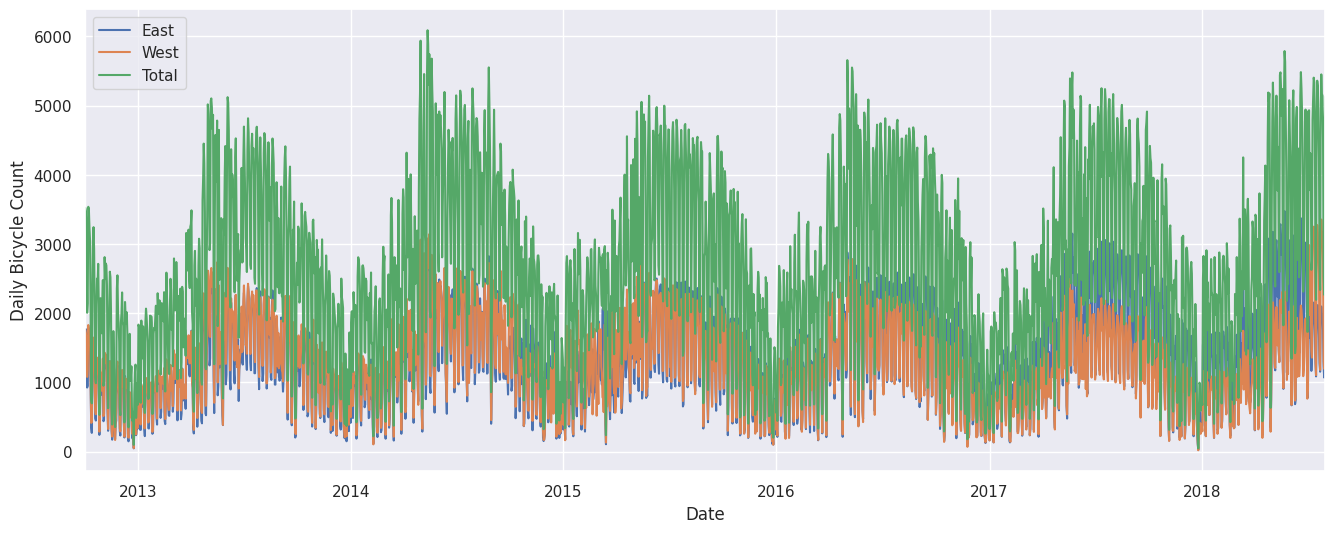

In [26]:
fb_daily = fb.resample('d').sum()
print('fb_daily size :',fb_daily.size)
fb_daily.plot(kind='line', figsize=(16,6))
plt.ylabel('Daily Bicycle Count')
# Observation: It's still dense with daily data.

fb_weekly size : 915


Text(0, 0.5, 'Weekly Bicycle Count')

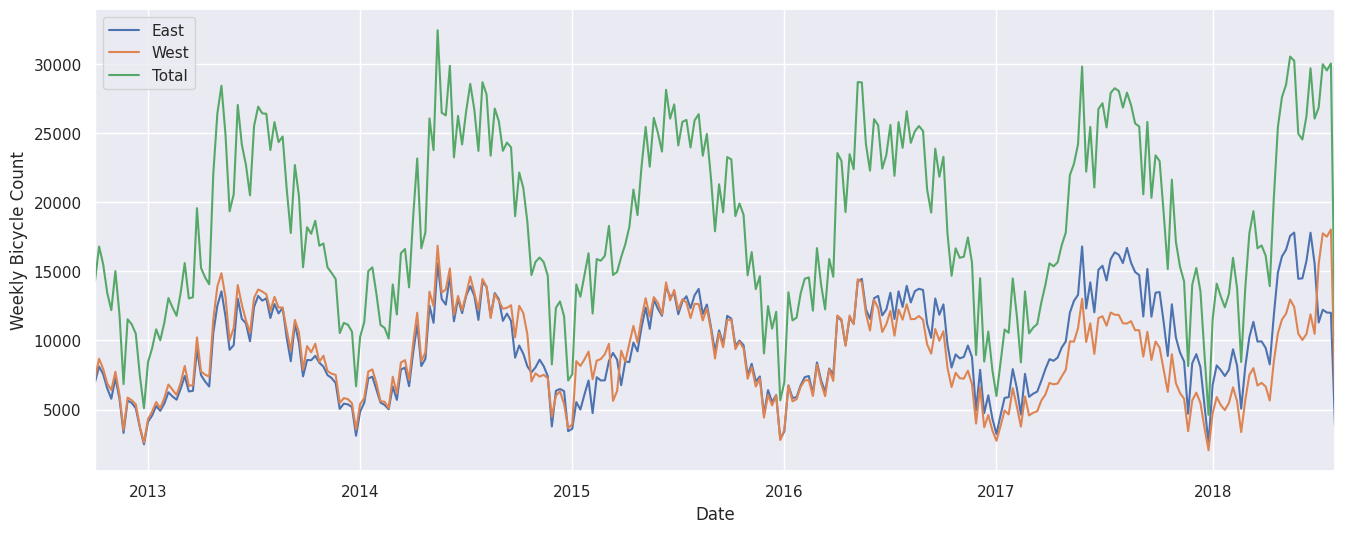

In [27]:
fb_weekly = fb_daily.resample('W').sum()
print('fb_weekly size :',fb_weekly.size)
fb_weekly.plot(kind='line', figsize=(16,6))
plt.ylabel('Weekly Bicycle Count')

Hourly Ticks : [    0  3600  7200 10800 14400 18000 21600 25200 28800 32400 36000 39600
 43200 46800 50400 54000 57600 61200 64800 68400 72000 75600 79200 82800]


(array([    0,  3600,  7200, 10800, 14400, 18000, 21600, 25200, 28800,
        32400, 36000, 39600, 43200, 46800, 50400, 54000, 57600, 61200,
        64800, 68400, 72000, 75600, 79200, 82800]),
 [Text(0, 0, '00:00'),
  Text(3600, 0, '01:00'),
  Text(7200, 0, '02:00'),
  Text(10800, 0, '03:00'),
  Text(14400, 0, '04:00'),
  Text(18000, 0, '05:00'),
  Text(21600, 0, '06:00'),
  Text(25200, 0, '07:00'),
  Text(28800, 0, '08:00'),
  Text(32400, 0, '09:00'),
  Text(36000, 0, '10:00'),
  Text(39600, 0, '11:00'),
  Text(43200, 0, '12:00'),
  Text(46800, 0, '13:00'),
  Text(50400, 0, '14:00'),
  Text(54000, 0, '15:00'),
  Text(57600, 0, '16:00'),
  Text(61200, 0, '17:00'),
  Text(64800, 0, '18:00'),
  Text(68400, 0, '19:00'),
  Text(72000, 0, '20:00'),
  Text(75600, 0, '21:00'),
  Text(79200, 0, '22:00'),
  Text(82800, 0, '23:00')])

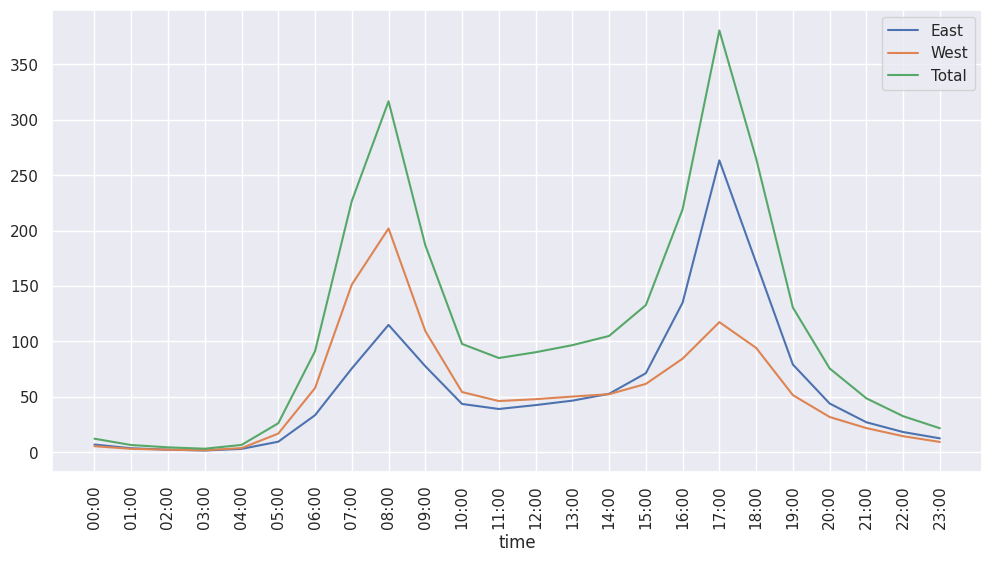

In [28]:
# We might want to look at the average traffic as a function of the time of day.
gby_time = fb.groupby(fb.index.time).mean()
hourly_ticks = 60 * 60 * np.arange(24)
print('Hourly Ticks :', hourly_ticks)
gby_time.plot(xticks=hourly_ticks,figsize=(12,6))
plt.xticks(rotation='vertical')

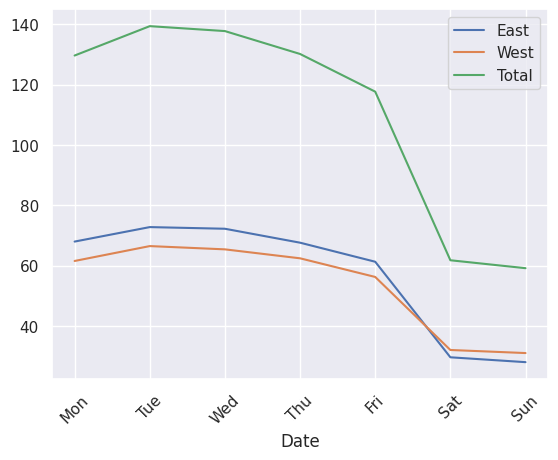

In [29]:
# Again, we can do this with a simple groupby
gby_week = fb.groupby(fb.index.dayofweek).mean()
# print(gby_week)
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# print('gby_week index =',gby_week.index.tolist())
# gby_week.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
# print('gby_week index =',gby_week.index.tolist())
gby_week.plot()
plt.xticks(range(len(weekdays)),weekdays, rotation=45)
plt.show()


In [17]:
weather=pd.read_csv('/content/BicycleWeather.csv',index_col='DATE',parse_dates=True)
counts=pd.read_csv('/content/FremontBridge.csv', index_col='Date', parse_dates=True)

<ipython-input-17-f63adbb19cf6>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  counts=pd.read_csv('/content/FremontBridge.csv', index_col='Date', parse_dates=True)


In [30]:
weather.head()

,STATION,STATION_NAME,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,...,WT17,WT05,WT02,WT22,WT04,WT13,WT16,WT08,WT18,WT03
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,0,0,0,128,50,47,100,90,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
2012-01-02,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,109,0,0,106,28,45,180,200,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-03,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,8,0,0,117,72,23,180,170,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999
2012-01-04,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,203,0,0,122,56,47,180,190,...,-9999,-9999,-9999,-9999,-9999,1,1,-9999,-9999,-9999
2012-01-05,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,13,0,0,89,28,61,200,220,...,-9999,-9999,-9999,-9999,-9999,-9999,1,-9999,-9999,-9999


In [31]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

In [32]:
daily

,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
2012-10-07,2142.0
...,...
2018-07-27,4509.0
2018-07-28,2535.0
2018-07-29,2266.0


In [33]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [34]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
2018-07-27,4509.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2018-07-28,2535.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2018-07-29,2266.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
from pandas.tseries.holiday import USFederalHolidayCalendar

In [36]:
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')

In [37]:
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

In [38]:

weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

In [39]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [40]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.35,1.0,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,13.60,1.0,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15.30,1.0,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.85,1.0,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.85,1.0,0.010959


In [41]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

<Axes: xlabel='Date'>

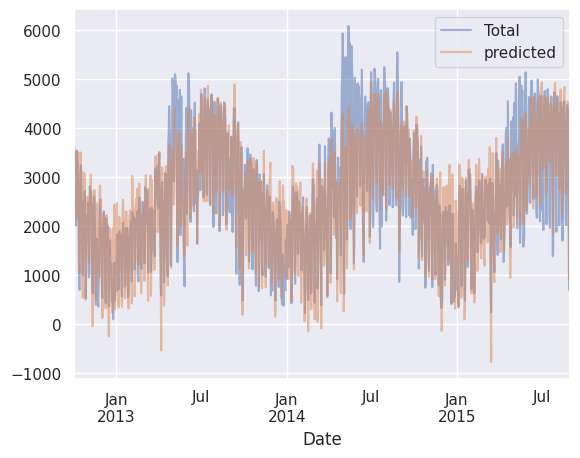

In [42]:
daily[['Total', 'predicted']].plot(alpha=0.5)